# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Inflation Rates-United States Data

## 01 Importing libraries and data

In [1]:
# import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('seaborn-darkgrid')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '7NXTFoY16i9oTtizfd2b'

In [3]:
# Importing Inflation Rates Data "Consumer Price Index - United States" variable.

data = quandl.get('RATEINF/CPI_USA')

In [4]:
data.head(5)

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [5]:
data.shape

(1320, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

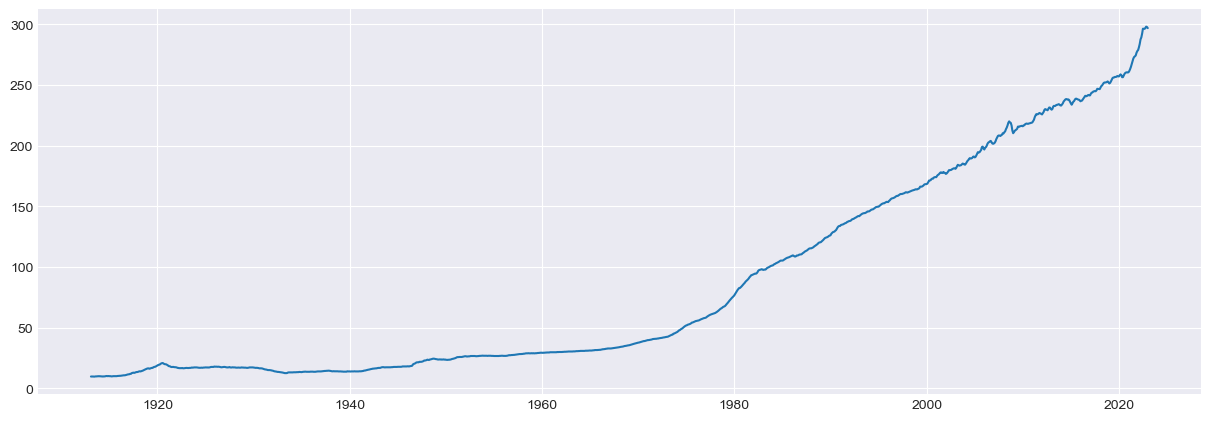

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

## 02 Subsetting, wrangling, and cleaning time-series data

In [9]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,1913-01-31,9.8
1,1913-02-28,9.8
2,1913-03-31,9.8
3,1913-04-30,9.8
4,1913-05-31,9.7


In [11]:
data_sub = data_2.loc[(data_2['Date'] >= '2003-09-12') & (data_2['Date'] < '2023-01-31')]

#### Steam was released on September 12, 2003 so that is the date I selected for the beginning of this subset. Inflation rates from there forward may effect video game sales and purchasing choices. 

In [12]:
data_sub.shape

(232, 2)

In [13]:
data_sub.head()

,Date,Value
1088,2003-09-30,185.2
1089,2003-10-31,185.0
1090,2003-11-30,184.5
1091,2003-12-31,184.3
1092,2004-01-31,185.2


In [14]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2003-09-30,185.2
2003-10-31,185.0
2003-11-30,184.5
2003-12-31,184.3
2004-01-31,185.2


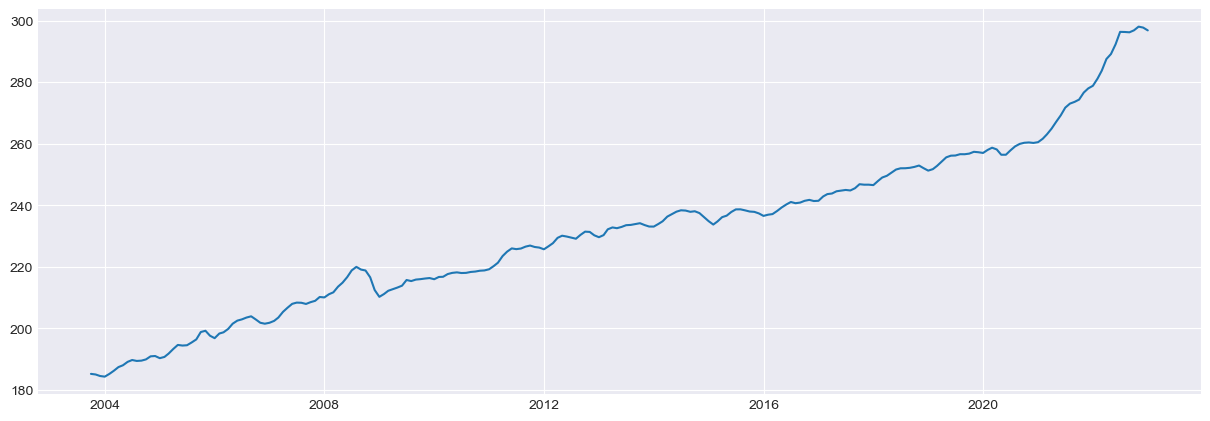

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# Checking for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [17]:
# Checking for duplicates

dups = data_sub.duplicated()
dups.sum()


4

In [18]:
# Searching for rows with duplicates
duprows = data_sub[data_sub.duplicated()]

duprows

,Value
datetime,
2004-01-31,185.2
2006-09-30,202.9
2006-11-30,201.5
2006-12-31,201.8


In [19]:
# dropping duplicates
data_sub = data_sub.drop_duplicates()

In [20]:
# rechecking for duplicates
dups2 = data_sub.duplicated()
dups2.sum() # duplicates have been removed

0

## 03 Time-series analysis: decomposition

In [21]:
# Importing seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period = 1)

In [23]:
# Set plot parameters
from pylab import rcParams

rcParams['figure.figsize'] = 18, 10

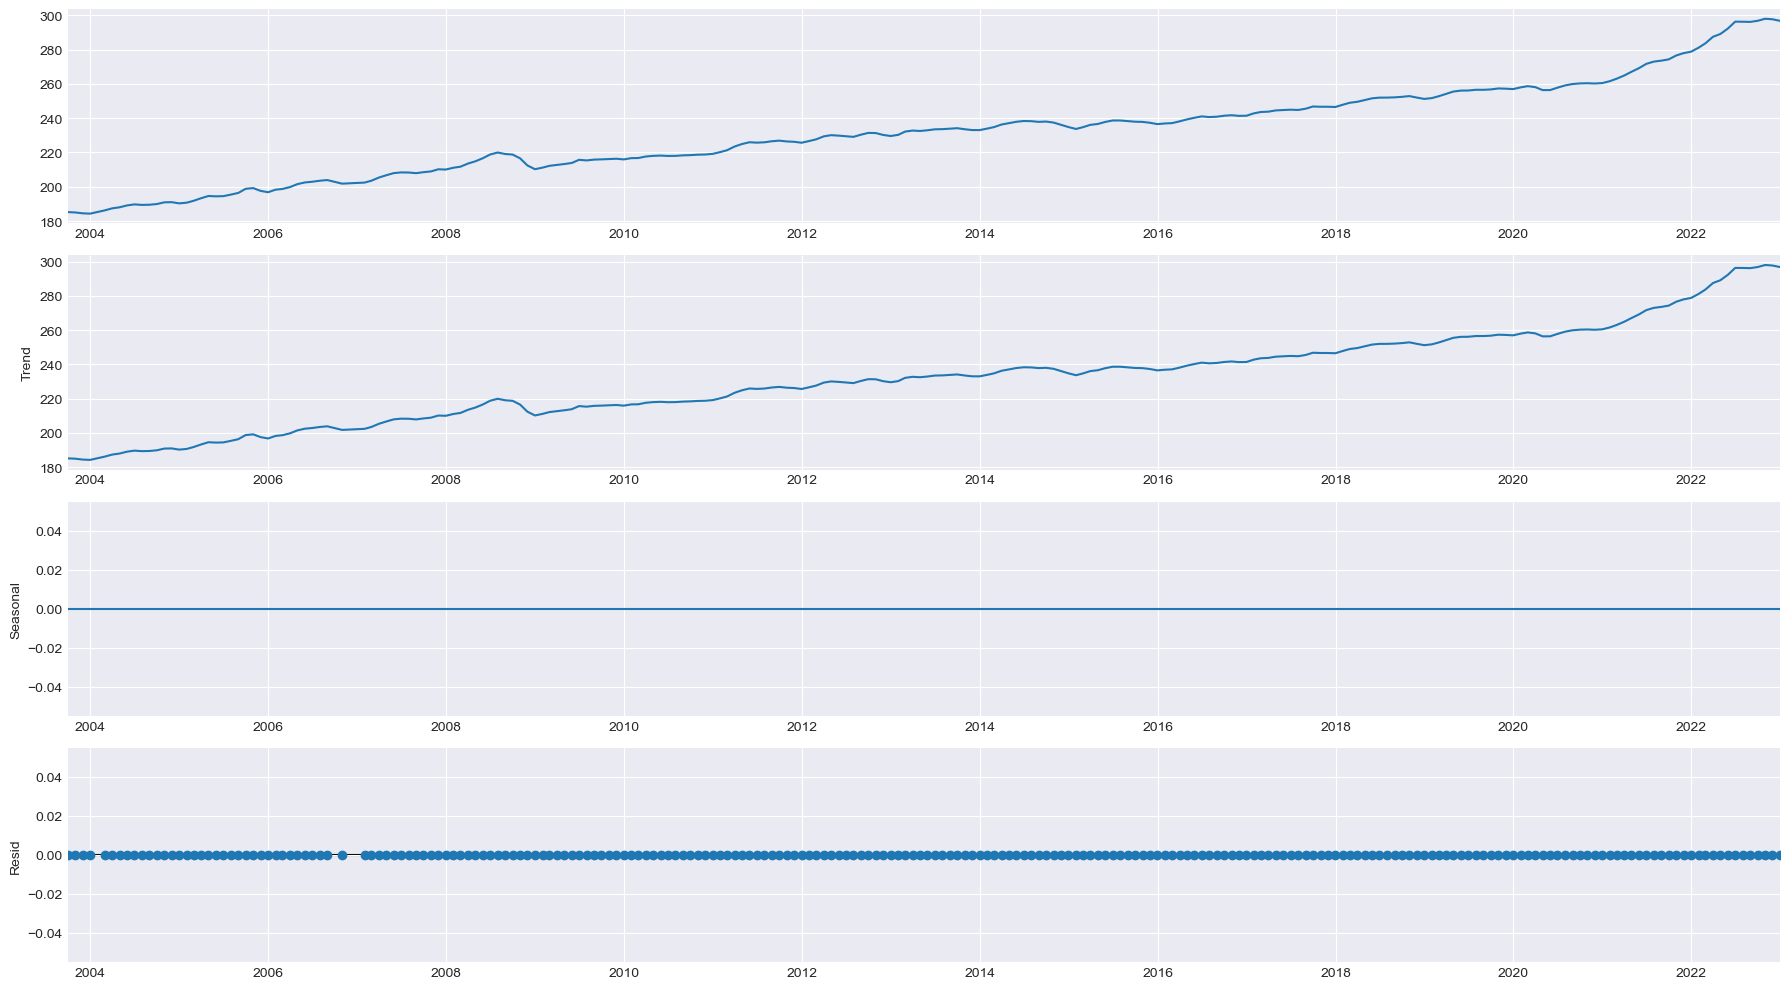

In [24]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The first chart is the data itself, or 'the level.' The second chart is the underlying trend. The first and second chart are similar because the data didn't much noise and did not have to be smoothed. The trend is showing a gradual increase in inflation between 2003 to the present (although there seems to be a sudden drop in 2009; likely due to the recession that occured between 2007-2009). The rate of inflation also appears to increase more rapidly after 2020 (likely due to COVID and global economic patterns still in affect today). The third component is seasonality; in this case there is none. The final chart represent the noise. For the most part, there is no unexplained noise here, but there does seem to be a gap between 2006 and 2008. 

## 04 Testing for stationarity

In [25]:
# Import the adfuller function

from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.011163
p-value                          0.994382
Number of Lags Used              2.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


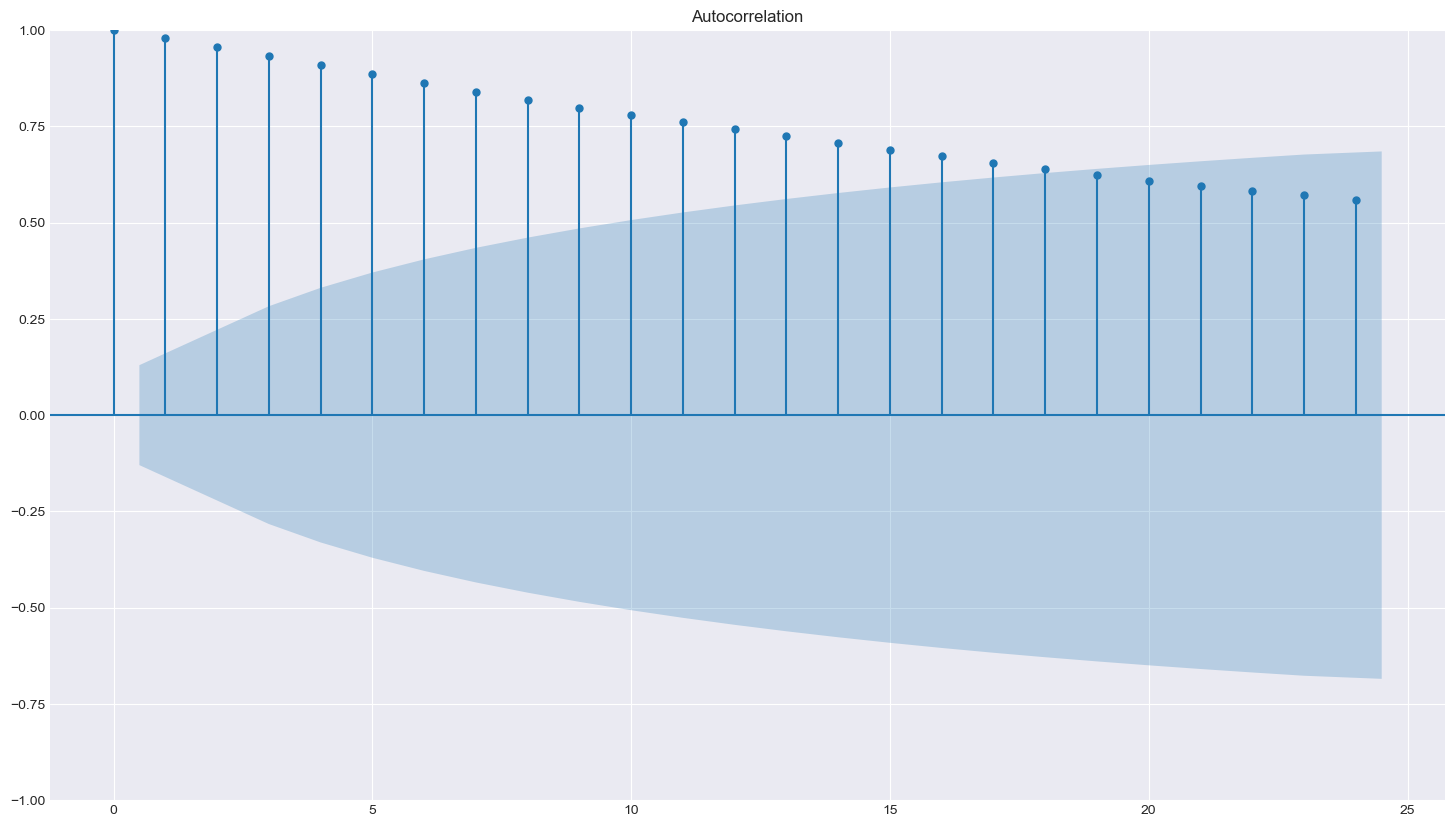

In [26]:
# Plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()

## 05 Stationarizing the Inflation Rates data

In [27]:
# Applying data shift function
data_diff = data_sub - data_sub.shift(1)

In [28]:
# Dropping null values

data_diff.dropna(inplace = True)

In [29]:
# Inspecting shifted data
data_diff.head()

,Value
datetime,
2003-10-31,-0.2
2003-11-30,-0.5
2003-12-31,-0.2
2004-02-29,1.9
2004-03-31,1.2


In [30]:
data_diff.columns

Index(['Value'], dtype='object')

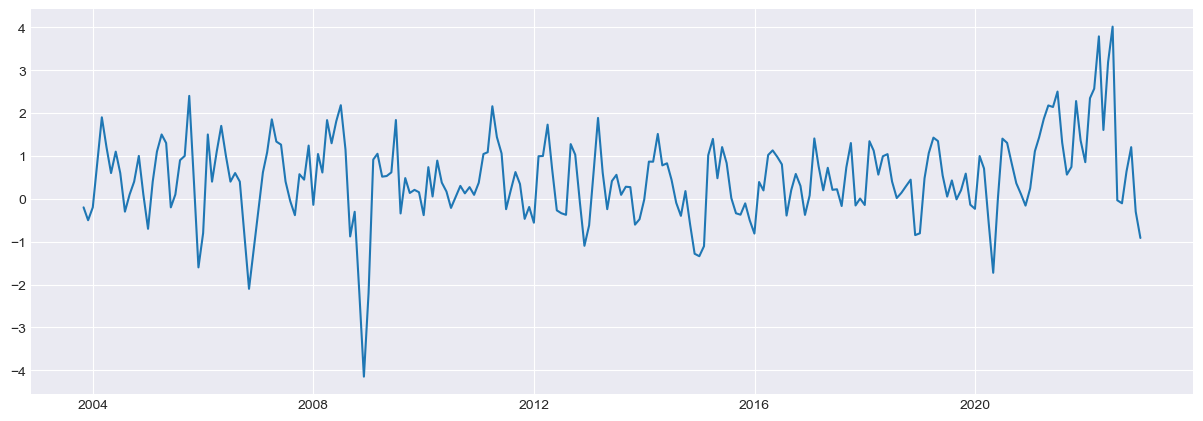

In [31]:
# Plotting data_diff

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
# Running Dickey_Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.521809e+00
p-value                        1.095529e-13
Number of Lags Used            1.000000e+00
Number of Observations Used    2.250000e+02
Critical Value (1%)           -3.459752e+00
Critical Value (5%)           -2.874473e+00
Critical Value (10%)          -2.573663e+00
dtype: float64


####  The Dickey-Fuller test checks for the presence of a random jump that cannot be explained by variation in the data, called a unit root. After applying the data shift function to the Inflation Data, the results of the Dickey-Fuller test are as follows: The test statistic (-8.5) is smaller than the critical values at 1 (-3.5), 5 (-2.9), and 10 (-2.6) percent. The p-value is nearly 0 and so meets the requirement for p<0.05. This means that the null hypothesis, that there is a unit root present, has been disproven (there is no unit root) and the series can now be considered stationary.  

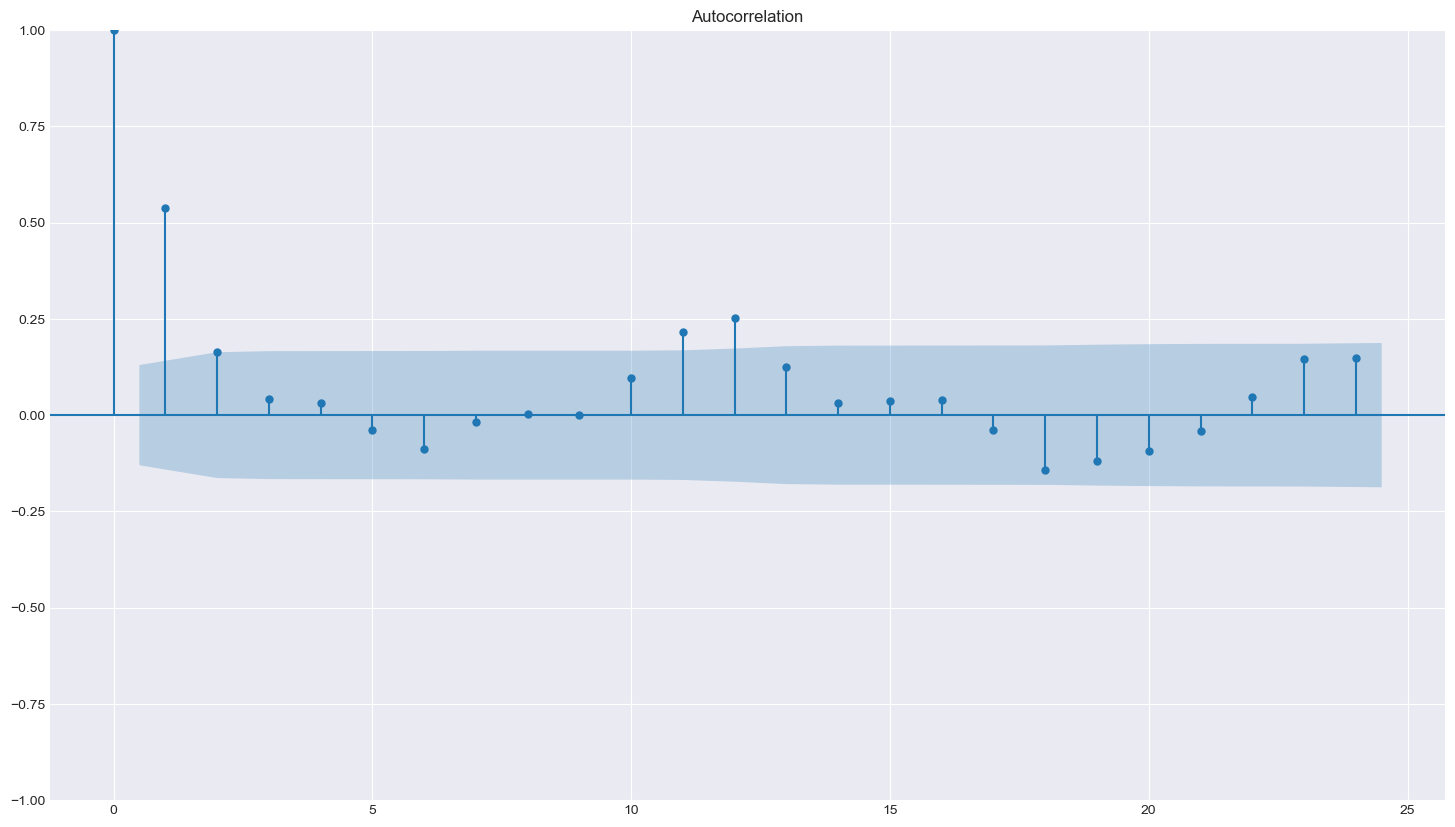

In [33]:
# Checking data's autocorrelations.
plot_acf(data_diff)
plt.show()

#### There are still a few lines above the blue confidence interval, however, the vast majority of them are within. As there are only 4 vertical lines above the confidence interval (less than 10), a second round of differencing is not necessary. 